In [1]:
import json
import pandas as pd
pd.options.mode.chained_assignment = None
from tqdm import tqdm
import numpy as np
import regex as re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity, paired_distances
import numpy as np
np.random.seed(0)

from tqdm import tqdm
import random

# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set_theme(style="white", palette="Set2")
import scipy
import json

from scipy import sparse

import time
import gc

from sklearn.manifold import TSNE

In [2]:
data_dir = '2021-07-19'
colors = ['darkgrey','crimson','lightcoral','saddlebrown',
          'orange','lawngreen',
          'teal','skyblue','royalblue','navy',
          'deeppink','c']

In [3]:
len(colors)

12

In [4]:
papers = pd.read_csv(f'scibert_encoded_papers/valid_metadata_{data_dir}.csv',sep='\t').set_index('cord_uid')[['title','journal','publish_time']].sort_values('publish_time')

In [5]:
jrnls = Counter(papers['journal']).most_common()

In [6]:
# pd.DataFrame(jrnls,columns=['JRNL','CNT']).to_excel('jrnls_cnt.xlsx')

In [7]:
# selected = ['Int J Environ Res Public Health','Front Public Health','Br J Surg','Front Immunol','Int J Mol Sci','J Clin Med']
# selected = ['Int J Environ Res Public Health','Br J Surg','Int J Mol Sci']
selected = ['Br J Surg','MMWR Morb Mortal Wkly Rep','Rev Med Virol','Front Immunol',
            'Int J Mol Sci','Emerg Infect Dis','J Med Internet Res',
            'Front Cell Dev Biol','JAMA Netw Open','Curr Psychol','Foods','Nat Commun']
# selected = ['']
# selected = [jrnl for jrnl, cnt in jrnls[:10]]

In [8]:
n_per_class = 50

In [9]:
samples = []
for jrnl in selected:
    df = papers.loc[papers['journal']==jrnl]
    if df.shape[0] > n_per_class:
        df = df.sample(n=n_per_class, random_state=0)
    samples.append(df)
samples = pd.concat(samples,axis=0)

In [10]:
samples['label'] = list(map(lambda x:selected.index(x),samples['journal'].tolist()))

In [11]:
models_embeddings = dict()

for method in ['tfidf','glove','scibert']:#
    # method = 'scibert'
    # method = 'tfidf'
    # SCIBERT Embedding
    if method == 'scibert':
        print('scibert')
        title_embs_df = pd.read_csv(f'scibert_encoded_papers/title_embs_df_{data_dir}.csv',index_col=0)
        abstract_embs_df = pd.read_csv(f'scibert_encoded_papers/abstract_embs_df_{data_dir}.csv',index_col=0)
        paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
        uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
        X = paper_emb.values[list(map(lambda x:uid_map[x],samples.index.tolist()))]

    # Glove Embedding
    if method == 'glove':
        print('glove')
        title_embs_df = pd.read_csv(f'title_embs_df_glove_{data_dir}.csv',index_col=0)
        abstract_embs_df = pd.read_csv(f'abstract_embs_df_glove_{data_dir}.csv',index_col=0)
        paper_emb = title_embs_df.join(abstract_embs_df,lsuffix='_ti',rsuffix='_ab')
        uid_map = {uid:i for i,uid in enumerate(title_embs_df.index)}
        X = paper_emb.values[list(map(lambda x:uid_map[x],samples.index.tolist()))]


    # TF-IDF Embedding
    if method == 'tfidf':
        print('tfidf')
        values = scipy.sparse.load_npz(f'tf-idf-results/values_{data_dir}_scibert_token.npz')
        index = json.load(open(f"tf-idf-results/index_{data_dir}_scibert_token",'r',encoding='utf-8'))
        column = json.load(open(f"tf-idf-results/column_{data_dir}_scibert_token",'r',encoding='utf-8'))
        # paper_emb = pd.DataFrame.sparse.from_spmatrix(values,columns=column,index=index)
        uid_map = {uid:i for i,uid in enumerate(index)}
        X = values[list(map(lambda x:uid_map[x],samples.index.tolist()))]
    
    models_embeddings[method] = X

tfidf
glove
scibert


In [12]:
not_show = []

c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,
c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\86187\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

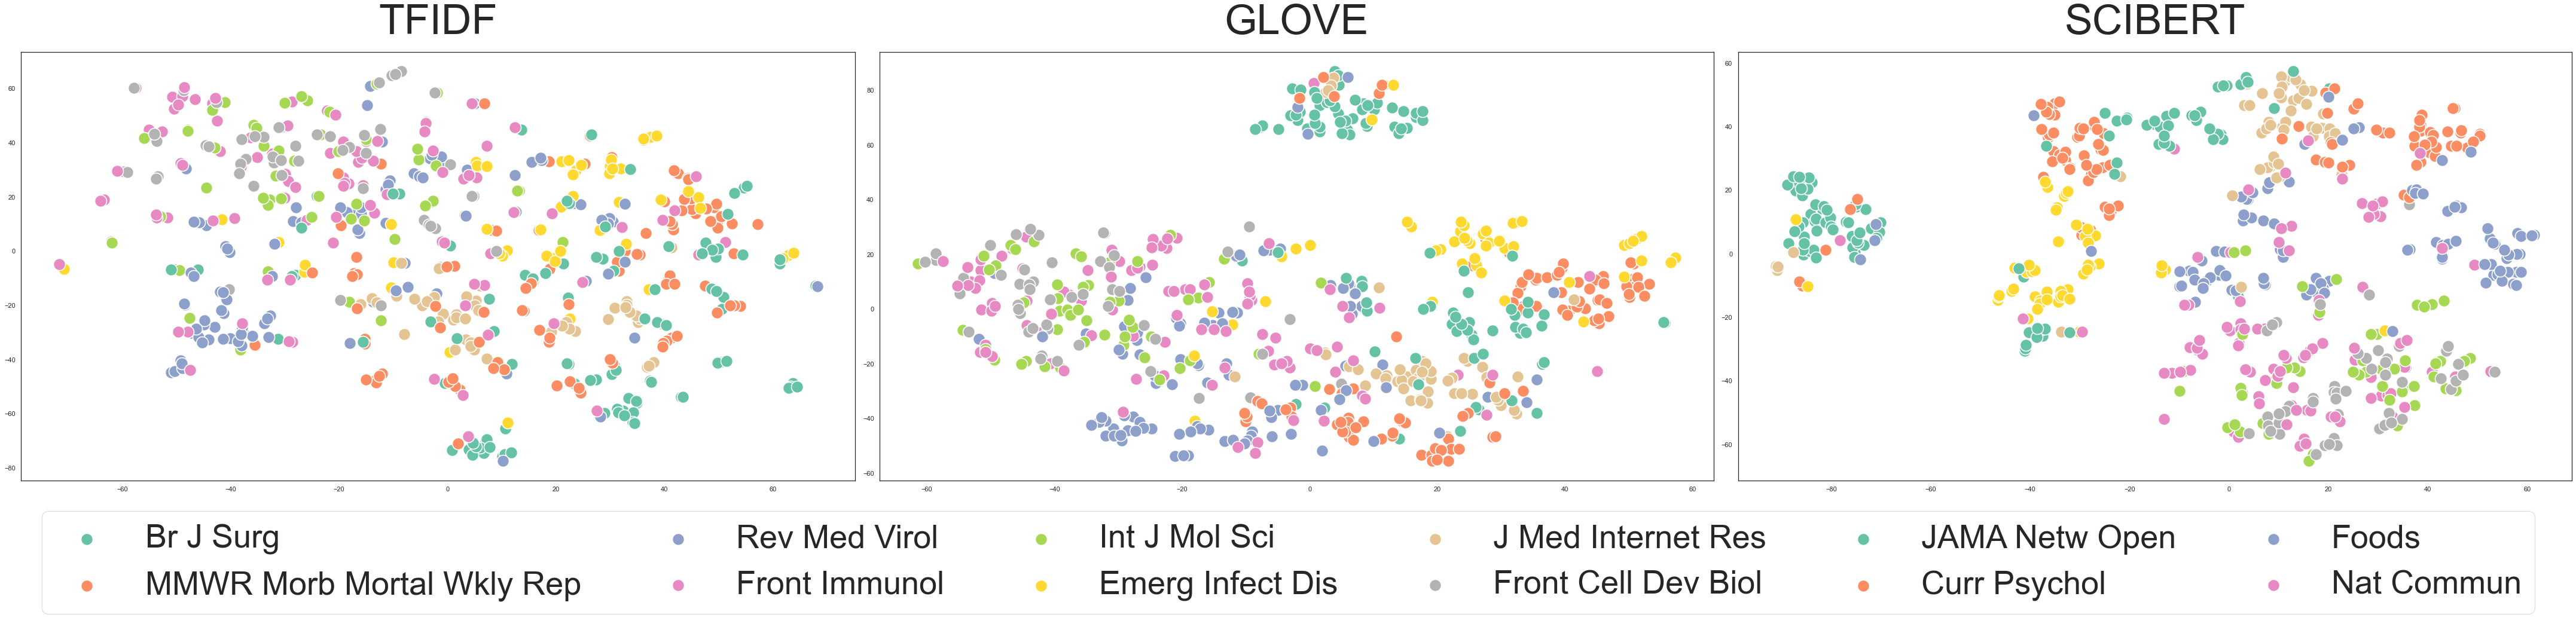

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(60,15))

for idx, (method_name, x) in enumerate(models_embeddings.items()):

    X_tsne = TSNE(n_components=2, perplexity=5,learning_rate=200, metric='cosine',n_jobs=-1, random_state = 0).fit_transform(x) 

    # plt.figure(figsize=(15,15))
    for i in range(len(selected)):
        if i not in not_show:
            cords = X_tsne[samples['label'] == i]
            x,y = cords[:,0],cords[:,1]
            sns.scatterplot(x,y,marker='o', ax=axes[idx], label=selected[i], s=400, alpha=1.0, legend=False) # , c=colors[i], label=selected[i]
    #         plt.scatter(x,y,marker='o', label=selected[i])

    axes[idx].set_title(method_name.upper(), fontsize=70, pad=30)
#     ax = axes[idx]
#     axes[idx].legend(fontsize=12, loc='best')
#     plt.legend()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(selected)//2, fontsize=54)
    
fig.tight_layout()
fig.subplots_adjust(bottom=0.25)

fig.savefig(f"paper_jrnls/paper_jrnls.jpg", dpi=500)